<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Model/0_rf-PCA_Mutate-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pandas-profiling

In [2]:
import pandas as pd

In [3]:
#import pandas_profiling

In [4]:
df = pd.read_csv('credit_cards_dataset.csv')

In [5]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [6]:
#df.profile_report()

In [7]:
#df.corr(method='pearson')

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

PCA for Pay_Score Bill_Amount Pay_Amount

In [9]:
from sklearn.decomposition import PCA

In [10]:
df_Pay_Score = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [11]:
df_Bill_Amount = df[[ 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [12]:
df_Pay_Amount = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [13]:
#df_Pay_Amount.mean(axis=1)

In [14]:
df_Pay_Score.head(3)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0


In [15]:
df_Bill_Amount.head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0


In [16]:
df_Pay_Amount.head(3)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0


PCA instance 생성

In [17]:
trans = PCA(n_components=1)

In [18]:
X_Pay_Score = df_Pay_Score.values

In [19]:
X_Bill_Amount = df_Bill_Amount.values

In [20]:
X_Pay_Amount = df_Pay_Amount.values

In [21]:
# transform the data
X_dim = trans.fit_transform(X_Pay_Score)

In [22]:
X_dim.shape

(30000, 1)

In [23]:
df_X_dim_Pay_Score = pd.DataFrame(X_dim, columns=['Pay_AVR'])

In [24]:
# transform the data
X_dim = trans.fit_transform(X_Bill_Amount)

In [25]:
df_X_dim_Bill_Amount = pd.DataFrame(X_dim, columns=['Bill_AVR'])

In [26]:
# transform the data
X_dim = trans.fit_transform(X_Pay_Amount)

In [27]:
df_X_dim_Pay_Amount = pd.DataFrame(X_dim, columns=['P_AMT_AVR'])

Mutate Variable I : Credit Utilize

In [28]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [29]:
df['Bill_Amount_AVR'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])/6

In [30]:
df['Credit_Util'] = (df['Bill_Amount_AVR'] / df['LIMIT_BAL'])*100

In [31]:
df['Credit_Util'].describe()

count    30000.000000
mean        37.304795
std         35.188994
min        -23.259000
25%          2.999701
50%         28.483403
75%         68.792911
max        536.430833
Name: Credit_Util, dtype: float64

Mutate Variable 2 : Bill to Pay Rate

In [32]:
df_Pay_Amount.mean(axis=1)

0          114.833333
1          833.333333
2         1836.333333
3         1398.000000
4         9841.500000
             ...     
29995     7091.666667
29996     2415.000000
29997     5216.666667
29998    24530.166667
29999     1384.666667
Length: 30000, dtype: float64

In [33]:
df_Bill_Amount.mean(axis=1)

0          1284.000000
1          2846.166667
2         16942.166667
3         38555.666667
4         18223.166667
             ...      
29995    120891.500000
29996      3530.333333
29997     11749.333333
29998     44435.166667
29999     38479.000000
Length: 30000, dtype: float64

In [34]:
df['Pay_Rate'] = (df_Pay_Amount.mean(axis=1) / df_Bill_Amount.mean(axis=1)).round(2)

In [35]:
#df['Pay_Sum'] = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

In [36]:
#df['Pay_Sum'] = df_Pay_Amount.sum(axis=1)

In [37]:
#df['Billed_Sum'] = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']

In [38]:
#df['Billed_Sum'] = df_Bill_Amount.sum(axis=1)

In [39]:
#df.isin([0]).any().any()
#0 in df.values

In [40]:
#df['Pay_Rate'] = ((df['Pay_Sum'] / df['Billed_Sum'])).round(2)

In [41]:
import numpy as np

In [42]:
df['Pay_Rate'].replace([np.inf, -np.inf, np.nan], 1, inplace=True)

In [43]:
df['Pay_Rate'].describe()

count    30000.000000
mean         0.409979
std          7.671398
min       -546.930000
25%          0.040000
50%          0.100000
75%          0.690000
max        797.000000
Name: Pay_Rate, dtype: float64

In [44]:
#df['Pay_Rate'].isnull().sum()

In [45]:
#df['Pay_Rate'].isin([np.inf]).any()

목표변수 : default.payment.next.month  Input 데이터 셋: X

In [46]:
df = pd.concat([df, df_X_dim_Pay_Score, df_X_dim_Bill_Amount, df_X_dim_Pay_Amount ], axis=1)

In [47]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'Bill_Amount_AVR', 'Credit_Util',
       'Pay_Rate', 'Pay_AVR', 'Bill_AVR', 'P_AMT_AVR'],
      dtype='object')

In [48]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Bill_Amount_AVR,Credit_Util,Pay_Rate,Pay_AVR,Bill_AVR,P_AMT_AVR
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1284.000000,6.420000,0.09,-0.516936,-107289.378431,-11443.690236
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2846.166667,2.371806,0.29,1.753527,-103860.702650,-10043.014174
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,16942.166667,18.824630,0.11,0.455994,-68874.738469,-8086.514262


In [49]:
X = df.drop(['ID','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Bill_Amount_AVR', 'default.payment.next.month'], axis =1).values

In [50]:
X.shape

(30000, 10)

In [51]:
y = df['default.payment.next.month'].values

Train Test Data Set 분리

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

RandomForest 모델 생성 및 학습

In [54]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3,random_state=1

In [55]:
#rf = RandomForestClassifier(n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3,random_state=1)

n_estimators=200, criterion='entropy', max_features='log2', max_depth=15

In [56]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_predict = rf.predict(X_test)

모델 성능 평가

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
import matplotlib.pyplot as plt

In [61]:
import numpy as np

In [62]:
import itertools

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6616  424]
 [1281  679]]


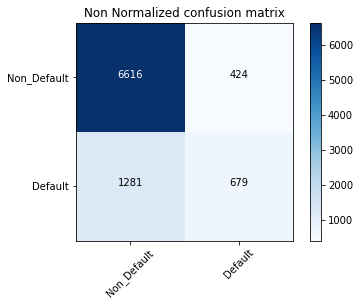

In [64]:
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

In [65]:
from sklearn.metrics import recall_score

In [66]:
print("Recall score:"+ str(recall_score(y_test, y_predict)))

Recall score:0.3464285714285714
